# ART calculations for `Bacillus Anthracis` bacteria

In [1]:
import sys
import os

# Completely suppress stderr output
sys.stderr = open(os.devnull, 'w')

# Now import everything
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
sys.path.append('.')   # Add local directory to access some of the functions
sys.path.append('../../') # Make sure this is the location for the ART library

import warning_utils
warning_utils.filter_end_user_warnings()

Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.

Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.
Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, omegas]
Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 19 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.
Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.
Exception ignored in: <function ResourceTracker.__del__ at 0xffffb60b56c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/loc

In [2]:
import pandas as pd
import numpy as np

from art.core import RecommendationEngine
import art.utility as utils
import pickle
import cloudpickle
import matplotlib.pyplot as plt

### Define directories

In [3]:
dataDir = '/code/DTRA_ART/DrugDesignData/'
modelBuildingDataDir = os.path.join(dataDir, 'modelBuildingData/')
resultsDir = os.path.join(dataDir, 'Results/')
artResultDir = resultsDir + 'ART_results/BacillusAnthracis/'
os.makedirs(artResultDir, exist_ok=True)
saveDir = os.path.join(resultsDir, "Bacillus_anthracis/")
os.makedirs(saveDir, exist_ok=True)

### Extract the data for `Bacillus Anthracis` into a data frame with `duplicate` SMILES

In [4]:
BacillusAnthracisData_chEMBL_wMACAW = pd.read_csv(modelBuildingDataDir + "BacillusAnthracisData_chEMBL_wMACAW.csv")
BacillusAnthracisData_chEMBL_wMACAW 

,ID,compound_id,Smiles,pPotency,BacteriaClassifier,MACAW_1,MACAW_2,MACAW_3,MACAW_4,MACAW_5,MACAW_6,MACAW_7,MACAW_8,MACAW_9,MACAW_10,MACAW_11,MACAW_12,MACAW_13,MACAW_14,MACAW_15
0,1,CHEMBL1257070,Cc1oc(=O)oc1COC(=O)C1=C([C@H]2CCCO2)S[C@@H]2[C...,0.120000,Bacillus_anthracis,0.015372,0.051963,0.090780,-0.057362,0.204566,-0.047729,0.029518,-0.005746,-0.143630,0.015398,0.244936,-0.184698,0.174110,-0.268072,0.244989
1,2,CHEMBL29,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,2.000000,Bacillus_anthracis,-0.111090,0.095982,0.550419,0.189785,-0.045350,0.095441,-0.085442,0.159806,-0.030104,0.095547,-0.040429,0.038897,-0.025414,0.074428,-0.062345
2,3,CHEMBL29,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,2.000000,Bacillus_anthracis,-0.111090,0.095982,0.550419,0.189785,-0.045350,0.095441,-0.085442,0.159806,-0.030104,0.095547,-0.040429,0.038897,-0.025414,0.074428,-0.062345
3,4,CHEMBL29,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,2.000000,Bacillus_anthracis,-0.111090,0.095982,0.550419,0.189785,-0.045350,0.095441,-0.085442,0.159806,-0.030104,0.095547,-0.040429,0.038897,-0.025414,0.074428,-0.062345
4,5,CHEMBL529,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,2.000000,Bacillus_anthracis,0.418191,0.015784,0.068311,-0.114155,-0.029640,-0.260658,0.299672,0.126969,0.158504,-0.077020,-0.182679,0.031307,-0.140311,-0.046963,0.017386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,849,CHEMBL560502,CCCC1c2ccccc2C=NN1C(=O)/C=C/c1cc(Cc2cnc(N)nc2N...,7.267606,Bacillus_anthracis,-0.007207,-0.208137,-0.071477,0.094083,0.141655,-0.107745,-0.215205,-0.049829,0.234638,0.002227,0.067204,-0.001224,0.026450,0.082063,-0.012081
668,851,CHEMBL561523,COc1cc(/C=C2\SC(=S)N(c3cccc(C(F)(F)F)c3)C2=O)c...,4.022276,Bacillus_anthracis,-0.069517,-0.017578,0.028548,0.020121,0.010632,0.018470,0.015095,-0.024887,0.088167,-0.043094,0.001652,-0.083702,0.041403,-0.012752,0.058124
669,852,CHEMBL560919,Cc1c(Cc2ccccc2)c(=O)oc2c(O)c(O)ccc12,5.000000,Bacillus_anthracis,-0.169561,0.018300,0.024562,-0.044085,-0.007519,0.045224,0.106296,-0.117949,-0.007917,-0.085572,-0.010045,-0.002876,0.003661,0.031538,0.043956
670,855,CHEMBL5191499,O=C1CC(c2ccccc2)=NN1c1nc2ccccc2[nH]c1=O,7.800000,Bacillus_anthracis,-0.162713,-0.049502,-0.015667,0.025730,-0.068216,-0.021088,0.017814,0.008098,0.025494,-0.038777,0.019712,-0.088628,-0.044824,-0.068245,-0.024961


### Prepare data to run `ART` on `Bacillus Anthracis` data with `duplicate` SMILES

#### Find Features and Response

In [5]:
input_var = [col for col in BacillusAnthracisData_chEMBL_wMACAW.columns if col.startswith('MACAW_')]
print(f"MACAW Embeddings: {len(input_var)}")
print(input_var)

MACAW Embeddings: 15
['MACAW_1', 'MACAW_2', 'MACAW_3', 'MACAW_4', 'MACAW_5', 'MACAW_6', 'MACAW_7', 'MACAW_8', 'MACAW_9', 'MACAW_10', 'MACAW_11', 'MACAW_12', 'MACAW_13', 'MACAW_14', 'MACAW_15']


In [6]:
features = BacillusAnthracisData_chEMBL_wMACAW[input_var].to_numpy()

In [7]:
response_var = ["pPotency"]
print(response_var)

['pPotency']


In [8]:
response = BacillusAnthracisData_chEMBL_wMACAW[response_var].to_numpy()

### save the data as a EDD style file

In [9]:
utils.save_edd_csv(features, response, input_var, modelBuildingDataDir + 'BacillusAnthracisData_chEMBL_wMACAW_ARTready.csv', response_var)

### Predict response with ART

In [10]:
BacillusAnthracisData_chEMBL_wMACAW_ARTready = pd.read_csv(modelBuildingDataDir + "BacillusAnthracisData_chEMBL_wMACAW_ARTready.csv")
BacillusAnthracisData_chEMBL_wMACAW_ARTready

,Line Name,Type,0.0
0,0,MACAW_1,0.015372
1,1,MACAW_1,-0.111090
2,2,MACAW_1,-0.111090
3,3,MACAW_1,-0.111090
4,4,MACAW_1,0.418191
...,...,...,...
10747,667,pPotency,7.267606
10748,668,pPotency,4.022276
10749,669,pPotency,5.000000
10750,670,pPotency,7.800000


### Define the ART parameters needed for the prediction

In [11]:
art_params = {
    'input_vars': input_var,
    'response_vars': response_var,
    'objective': 'maximize',
    'threshold': 0.2,
    'alpha': 0.5,
    'num_recommendations': 10,
    'max_mcmc_cores': 4,
    'seed': 42,                    
    'output_dir': artResultDir,
    'recommend': False,
    'cross_val': True,
    'num_tpot_models': 2,
}

### Run ART without recommendations but with cross-validations to gauge how generalizable the results are

ART identified 672 unique designs in the training data. 
Correctly communicating your designs is critical to building ART's model and to cross-validation.  We strongly suggest verifying ART's interpretation of your designs by inspecting the preprocessed DataFrame.  For example, if your ART instance is named `engine`, run `engine.df["Design"]`.  See Data Preparation docs for a description of how ART infers design information. https://lbl-biosci.gitlab.io/ese/art/Data_Preparation/#labeling-lines-designs-replicates-oh-my
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_regressor
is_regressor
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_regressor
is_regressor
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_regressor
is_regressor
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_regressor
is_regressor
is_regressor
is_classifier
is_classifier
is_classifier
is

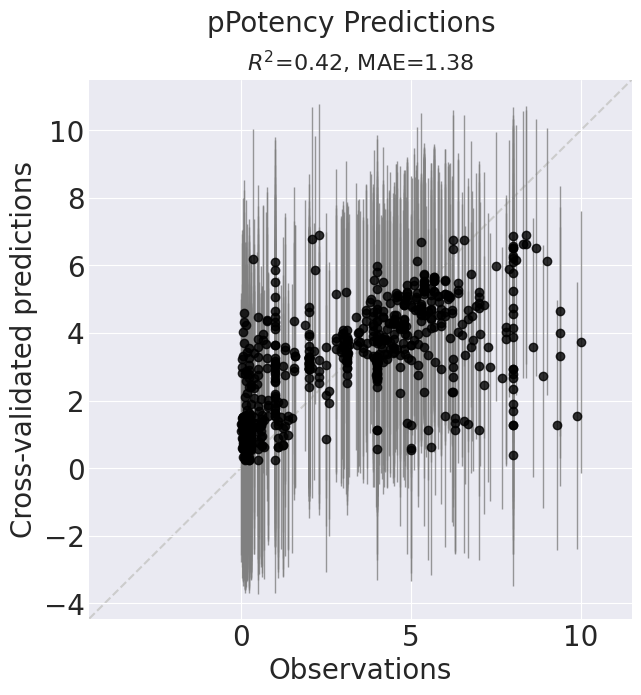

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
i

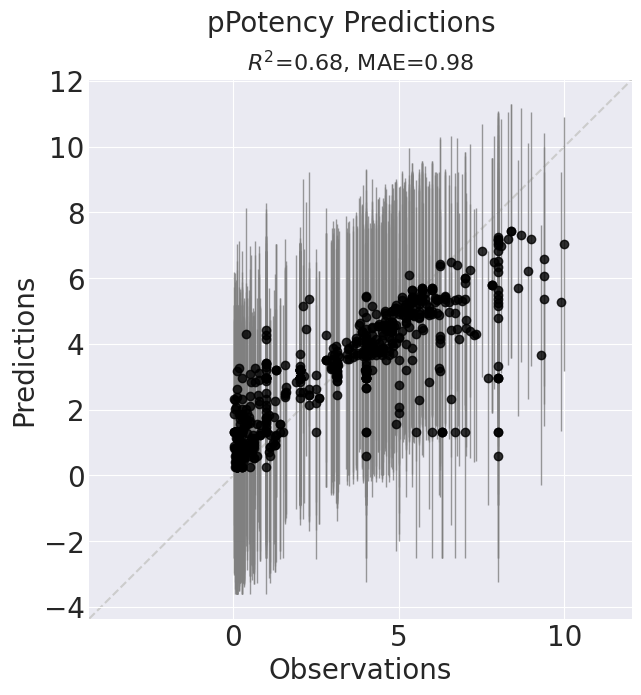

CPU times: user 20min 28s, sys: 7.86 s, total: 20min 35s
Wall time: 2h 22min 40s


In [12]:
%%time

art = RecommendationEngine(df=BacillusAnthracisData_chEMBL_wMACAW_ARTready, **art_params)

In [ ]:
import shap
import matplotlib.pyplot as plt

### Find SHAP values

We will now find which input features are more important by using SHAP analysis. First, lets initialize the library:

In [ ]:
shap.initjs()

In [ ]:
plt.style.use('default')

define a wrapper function that provides the ART prediction given and input X, for use by the SHAP library

In [ ]:
def f(X):
    return art.predict(X)

convert the ART input data into the pandas dataframe that the SHAP library favors

In [ ]:
X_df = pd.DataFrame(data=art.X, columns=art_params['input_vars'])

create and execute the explainer for the features values

In [ ]:
explainer_e   = shap.Explainer(f, X_df)
shap_values_e = explainer_e(X_df)

In [ ]:
shap.summary_plot(shap_values_e)

In [ ]:
shap.plots.heatmap(shap_values_e, instance_order=shap_values_e.sum(1), max_display=15)


### Load pre-trained ART model (if necessary, otherwise skip this step)

In [ ]:
ARTtrainedModelFile = os.path.join(artResultDir, 'art.cpkl')
with open(ARTtrainedModelFile, 'rb') as f:
    art = cloudpickle.load(f)
print(f" ART model loaded from: {ARTtrainedModelFile}")

### Load MACAW transformer (not required at this moment)

## 2.1 Discovery of new hits specific to all bacteria (data source Enamine_AntiBioticData.csv)

In this section, we screen a custom virtual library looking for molecules that are promising accoring to the the SVR models `regr` above, which use 15-D MACAW embeddings as their input. The custom library ("Enamine_AntiBioticData.csv") compiled from commercial catalogs by Enamine. In particular, we are interested in molecules with high predicted pPotency.

Load MACAW embeedings for external validation data set

In [16]:
BacillusAnthracis_EnamineDatasets_wMACAW = pd.read_csv(saveDir + "BacillusAnthracis_EnamineDataset_wMACAW.csv")
BacillusAnthracis_EnamineDatasets_wMACAW

,SMILES,MACAW_1,MACAW_2,MACAW_3,MACAW_4,MACAW_5,MACAW_6,MACAW_7,MACAW_8,MACAW_9,MACAW_10,MACAW_11,MACAW_12,MACAW_13,MACAW_14,MACAW_15
0,CC1=NN=C(COC(=O)C=2C=CC(=C(C2)[N+]([O-])=O)N3C...,-0.013727,0.004413,-0.011237,-0.056194,0.050808,-0.055735,-0.046481,-0.023960,0.027135,0.006812,0.048378,-0.012163,-0.009193,-0.073446,0.038540
1,CC1=NC2=NC(=NN2C(C)=C1C)SCCCOC(=O)NC(N)=O,-0.027404,0.037411,-0.044207,-0.016259,0.035822,-0.033022,-0.064674,0.019730,-0.036360,0.009857,0.021965,-0.009223,-0.014577,-0.059791,0.008324
2,CC=1C=CC(=CC1)S(=O)(=O)NCC(=O)OCC(=O)N2CC(C)OC...,-0.002157,0.018313,0.024089,-0.026967,0.058818,-0.025505,-0.010567,-0.006694,0.007143,-0.009700,0.100923,-0.004784,-0.005802,-0.033928,-0.003009
3,CC(C)N1C=NC(=C1)S(=O)(=O)NC=2C=CN(CC=3C=CC=CN3)N2,-0.064413,-0.017601,0.004075,0.021334,-0.060841,-0.044492,-0.021994,-0.004060,0.019349,-0.028466,0.028753,0.001134,-0.024470,-0.048136,-0.003525
4,O=C(O)CC=1C=CC(=CC1)S(=O)(=O)NC=2C=CC(Cl)=CC2O,-0.132460,0.039863,0.021110,-0.065518,-0.061347,0.072473,0.053660,-0.024681,0.041134,-0.106867,0.033182,-0.010512,0.026748,0.059299,0.008276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,CCOCCCOC(=O)C1=CC(=C(C)S1)[N+]([O-])=O,-0.035581,0.112569,-0.012011,-0.091387,0.044852,-0.015818,-0.018770,-0.055880,-0.012689,-0.022250,0.072584,0.054730,-0.009084,-0.046550,-0.003933
31996,CC(C)C(NS(=O)(=O)CC12CCC(CC1=O)C2(C)C)C(N)=O,0.024225,0.111831,0.084368,-0.009139,-0.017737,-0.033199,-0.002521,0.042212,-0.038672,0.034111,0.074479,-0.003341,0.023163,-0.011324,0.034736
31997,CNC(=O)CN1CCC(CC1)NS(=O)(=O)CCCC(F)(F)F,0.021036,0.126375,-0.026468,-0.067262,0.020612,0.019517,-0.002842,0.002395,-0.013028,0.011024,0.058598,0.013338,0.011355,0.012754,-0.021741
31998,CCOC(=O)NC1CCCN(C1)C(=O)C2=CC(=NN2C3CC3)C(F)(F)F,-0.009855,0.077342,-0.020208,-0.095309,0.066233,0.023307,-0.035457,0.061879,0.010195,0.061985,0.044213,-0.041541,-0.002113,-0.038552,-0.018573


In [17]:
macaw_columns = [col for col in BacillusAnthracis_EnamineDatasets_wMACAW.columns if col.startswith('MACAW_')]
smi_lib_EnamineDatasets_wMACAW = BacillusAnthracis_EnamineDatasets_wMACAW[macaw_columns].values

In [18]:
Y1_lib_pred = art.predict(smi_lib_EnamineDatasets_wMACAW)
Y1_lib_pred

array([[3.43562806],
       [3.43787818],
       [3.31965627],
       ...,
       [3.40758501],
       [2.16785361],
       [3.22030113]])

Get predictions with uncertainty using ART's post_pred_stats

In [19]:
# Pass X1_lib (features)
mean, std = art.post_pred_stats(smi_lib_EnamineDatasets_wMACAW)

# Now use these for your results
EnamineAntiBioticData_predicted = BacillusAnthracis_EnamineDatasets_wMACAW[['SMILES']].copy()
EnamineAntiBioticData_predicted['pPotency_prediction'] = mean
EnamineAntiBioticData_predicted['pPotency_std'] = std

# Calculate 95% Confidence Intervals
EnamineAntiBioticData_predicted['pPotency_lower_95CI'] = mean - 1.96 * std
EnamineAntiBioticData_predicted['pPotency_upper_95CI'] = mean + 1.96 * std

# Convert to IC50
EnamineAntiBioticData_predicted['IC50(M)_prediction'] = 10 ** (-mean)
EnamineAntiBioticData_predicted['IC50(M)_lower_95CI'] = 10 ** (-EnamineAntiBioticData_predicted['pPotency_upper_95CI'])
EnamineAntiBioticData_predicted['IC50(M)_upper_95CI'] = 10 ** (-EnamineAntiBioticData_predicted['pPotency_lower_95CI'])

# Select and save results
EnamineAntiBioticData_predicted = EnamineAntiBioticData_predicted.filter(
    items=["SMILES", "pPotency_prediction", "pPotency_std", 
           "pPotency_lower_95CI", "pPotency_upper_95CI",
           "IC50(M)_prediction", "IC50(M)_lower_95CI", "IC50(M)_upper_95CI"]
)

EnamineAntiBioticData_predicted.to_csv(os.path.join(saveDir + "BacillusAnthracis_wART_EnamineDataset_predicted_all.csv"), index=False)
EnamineAntiBioticData_predicted[['SMILES']].to_csv(os.path.join(saveDir + "BacillusAnthracis_wART_EnamineDataset_predicted_all_SMILES.csv"), index=False)
print(f"Predictions saved with uncertainty estimates")
EnamineAntiBioticData_predicted

Predictions saved with uncertainty estimates


,SMILES,pPotency_prediction,pPotency_std,pPotency_lower_95CI,pPotency_upper_95CI,IC50(M)_prediction,IC50(M)_lower_95CI,IC50(M)_upper_95CI
0,CC1=NN=C(COC(=O)C=2C=CC(=C(C2)[N+]([O-])=O)N3C...,3.435628,1.967421,-0.420516,7.291773,0.000367,5.107725e-08,2.633397
1,CC1=NC2=NC(=NN2C(C)=C1C)SCCCOC(=O)NC(N)=O,3.437878,1.967491,-0.418405,7.294161,0.000365,5.079708e-08,2.620625
2,CC=1C=CC(=CC1)S(=O)(=O)NCC(=O)OCC(=O)N2CC(C)OC...,3.319656,1.968720,-0.539036,7.178348,0.000479,6.632111e-08,3.459678
3,CC(C)N1C=NC(=C1)S(=O)(=O)NC=2C=CN(CC=3C=CC=CN3)N2,4.259310,1.970290,0.397541,8.121079,0.000055,7.566948e-09,0.400368
4,O=C(O)CC=1C=CC(=CC1)S(=O)(=O)NC=2C=CC(Cl)=CC2O,3.610204,1.964722,-0.240652,7.461060,0.000245,3.458912e-08,1.740410
...,...,...,...,...,...,...,...,...
31995,CCOCCCOC(=O)C1=CC(=C(C)S1)[N+]([O-])=O,3.068280,1.966520,-0.786099,6.922659,0.000855,1.194925e-07,6.110810
31996,CC(C)C(NS(=O)(=O)CC12CCC(CC1=O)C2(C)C)C(N)=O,3.270567,1.966247,-0.583277,7.124411,0.000536,7.509116e-08,3.830694
31997,CNC(=O)CN1CCC(CC1)NS(=O)(=O)CCCC(F)(F)F,3.407585,1.966311,-0.446385,7.261555,0.000391,5.475763e-08,2.795023
31998,CCOC(=O)NC1CCCN(C1)C(=O)C2=CC(=NN2C3CC3)C(F)(F)F,2.167854,1.968033,-1.689491,6.025198,0.006794,9.436309e-07,48.920469


## 2.2 Discovery of new hits specific to all bacteria (data source Life chemicals data set)

In this section, we screen a custom virtual library looking for molecules that are promising accoring to the the SVR models `regr` above, which use 15-D MACAW embeddings as their input. The custom library ("Enamine_AntiBioticData.csv") compiled from commercial catalogs by Enamine. In particular, we are interested in molecules with high predicted pPotency.

In [21]:
BacillusAnthracis_LCAntiBioticData_wMACAW = pd.read_csv(saveDir + "BacillusAnthracis_LCAntiviralsData_wMACAW.csv")
BacillusAnthracis_LCAntiBioticData_wMACAW

,SMILES,MACAW_1,MACAW_2,MACAW_3,MACAW_4,MACAW_5,MACAW_6,MACAW_7,MACAW_8,MACAW_9,MACAW_10,MACAW_11,MACAW_12,MACAW_13,MACAW_14,MACAW_15
0,COC1CCCN(c2cc(N(C)C)ncn2)C1,-0.024954,0.114214,-0.049197,-0.016613,0.002287,-0.066188,-0.033726,-0.018209,0.018007,-0.002395,0.026964,-0.015521,-0.056221,-0.045631,-0.010037
1,OC1CCCN(c2ncnc3c2CCCC3)C1,-0.042709,0.141031,-0.070043,-0.093456,-0.021003,-0.046367,-0.046760,-0.009459,-0.055329,0.017637,0.052167,-0.018575,-0.057457,0.011213,-0.006932
2,CC(C)N1CCN(c2ncc(F)cn2)CC1,-0.025938,0.118866,-0.066463,-0.028604,-0.036159,-0.021454,-0.013318,0.003346,0.001457,0.006607,0.024026,-0.019182,-0.021360,-0.017930,0.003997
3,CC1CN(c2cc(N(C)C)ncn2)CC(C)O1,-0.018794,0.093515,-0.008348,-0.003765,-0.041821,-0.082765,-0.033293,-0.027412,0.010550,-0.009190,0.033419,-0.012820,-0.023135,-0.077128,0.009491
4,CN(C)c1cc(N2CCCC(O)C2)ncn1,-0.031953,0.133094,-0.040622,-0.044152,-0.030739,-0.064137,-0.033389,-0.015156,-0.010537,0.013902,0.005949,0.001722,-0.069611,0.001481,-0.000954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15527,O=C1c2cccc3cccc(c23)C(=O)N1CCCN(C(=O)c1ccc(-c2...,-0.046432,-0.101893,-0.055757,0.012892,0.092907,0.048130,-0.001075,-0.048624,0.013580,0.043380,0.028720,0.008739,0.033025,0.034602,0.001025
15528,O=C1Nc2ccc(S(=O)(=O)Nc3ccc(NS(=O)(=O)c4ccc5c6c...,-0.027196,-0.086962,-0.030965,0.032165,-0.003559,0.040852,-0.006853,0.006864,-0.029234,-0.016926,0.001677,0.034939,0.070641,0.009453,-0.010321
15529,Cc1ncc(CO)c2cc(C(=O)Nc3cccc4ccccc34)/c(=N/c3cc...,-0.113547,-0.133396,-0.030479,0.073124,0.012230,-0.009457,-0.001539,0.030536,-0.032206,-0.062890,-0.032187,0.012891,0.011182,-0.007902,0.010595
15530,CCOC(=O)c1sc(NC(=O)c2ccc(Oc3ccc(C(=O)Nc4nc(-c5...,0.095975,-0.113799,-0.050281,0.053082,0.005363,0.074013,-0.059457,-0.024653,-0.040713,-0.019243,0.019166,0.035814,0.036233,-0.003550,-0.019659


In [22]:
macaw_columns = [col for col in BacillusAnthracis_LCAntiBioticData_wMACAW.columns if col.startswith('MACAW_')]
smi_lib_LCAntiBioticData_wMACAW = BacillusAnthracis_LCAntiBioticData_wMACAW[macaw_columns].values

In [23]:
Y1_lib_pred = art.predict(smi_lib_LCAntiBioticData_wMACAW)
Y1_lib_pred

array([[3.84135468],
       [3.72519044],
       [3.76949382],
       ...,
       [3.54732094],
       [3.83878462],
       [3.60620667]])

Get predictions with uncertainty using ART's post_pred_stats

In [24]:
# Pass X1_lib (features)
mean, std = art.post_pred_stats(smi_lib_LCAntiBioticData_wMACAW)

# Now use these for your results
LCAntiBioticData_predicted = BacillusAnthracis_LCAntiBioticData_wMACAW[['SMILES']].copy()
LCAntiBioticData_predicted['pPotency_prediction'] = mean
LCAntiBioticData_predicted['pPotency_std'] = std

# Calculate 95% Confidence Intervals
LCAntiBioticData_predicted['pPotency_lower_95CI'] = mean - 1.96 * std
LCAntiBioticData_predicted['pPotency_upper_95CI'] = mean + 1.96 * std

# Convert to IC50
LCAntiBioticData_predicted['IC50(M)_prediction'] = 10 ** (-mean)
LCAntiBioticData_predicted['IC50(M)_lower_95CI'] = 10 ** (-LCAntiBioticData_predicted['pPotency_upper_95CI'])
LCAntiBioticData_predicted['IC50(M)_upper_95CI'] = 10 ** (-LCAntiBioticData_predicted['pPotency_lower_95CI'])

# Select and save results
LCAntiBioticData_predicted = LCAntiBioticData_predicted.filter(
    items=["SMILES", "pPotency_prediction", "pPotency_std", 
           "pPotency_lower_95CI", "pPotency_upper_95CI",
           "IC50(M)_prediction", "IC50(M)_lower_95CI", "IC50(M)_upper_95CI"]
)

LCAntiBioticData_predicted.to_csv(os.path.join(saveDir + "BacillusAnthracis_wART_LCAntiBioticData_predicted_all.csv"), index=False)
LCAntiBioticData_predicted[['SMILES']].to_csv(os.path.join(saveDir + "BacillusAnthracis_wART_LCAntiBioticData_predicted_all_SMILES.csv"), index=False)
print(f"Predictions saved with uncertainty estimates")
LCAntiBioticData_predicted

Predictions saved with uncertainty estimates


,SMILES,pPotency_prediction,pPotency_std,pPotency_lower_95CI,pPotency_upper_95CI,IC50(M)_prediction,IC50(M)_lower_95CI,IC50(M)_upper_95CI
0,COC1CCCN(c2cc(N(C)C)ncn2)C1,3.841355,1.964944,-0.009936,7.692645,0.000144,2.029340e-08,1.023142
1,OC1CCCN(c2ncnc3c2CCCC3)C1,3.725190,1.965948,-0.128067,7.578448,0.000188,2.639683e-08,1.342973
2,CC(C)N1CCN(c2ncc(F)cn2)CC1,3.769494,1.965080,-0.082064,7.621051,0.000170,2.393033e-08,1.207991
3,CC1CN(c2cc(N(C)C)ncn2)CC(C)O1,3.980085,1.966951,0.124861,7.835309,0.000105,1.461139e-08,0.750134
4,CN(C)c1cc(N2CCCC(O)C2)ncn1,3.833000,1.964877,-0.018158,7.684158,0.000147,2.069390e-08,1.042697
...,...,...,...,...,...,...,...,...
15527,O=C1c2cccc3cccc(c23)C(=O)N1CCCN(C(=O)c1ccc(-c2...,4.073811,1.968800,0.214963,7.932660,0.000084,1.167723e-08,0.609589
15528,O=C1Nc2ccc(S(=O)(=O)Nc3ccc(NS(=O)(=O)c4ccc5c6c...,3.961535,1.975452,0.089649,7.833420,0.000109,1.467505e-08,0.813487
15529,Cc1ncc(CO)c2cc(C(=O)Nc3cccc4ccccc34)/c(=N/c3cc...,3.547321,1.969450,-0.312801,7.407443,0.000284,3.913427e-08,2.054948
15530,CCOC(=O)c1sc(NC(=O)c2ccc(Oc3ccc(C(=O)Nc4nc(-c5...,3.838785,1.971324,-0.025010,7.702579,0.000145,1.983449e-08,1.059277


## 2.3 Discovery of new hits specific to all viruses (data source `chemDiv` data set)

In this section, we screen a custom virtual library looking for molecules that are promising accoring to the the SVR models `regr` above, which use 15-D MACAW embeddings as their input. The custom library compiled from commercial catalogs by Enamine. In particular, we are interested in molecules with high predicted pPotency.

In [25]:
BacillusAnthracis_ChemDivAntiBioticData_wMACAW = pd.read_csv(saveDir + "BacillusAnthracis_ChemDivAntiviralsData_wMACAW.csv")
BacillusAnthracis_ChemDivAntiBioticData_wMACAW

,SMILES,MACAW_1,MACAW_2,MACAW_3,MACAW_4,MACAW_5,MACAW_6,MACAW_7,MACAW_8,MACAW_9,MACAW_10,MACAW_11,MACAW_12,MACAW_13,MACAW_14,MACAW_15
0,O=C(Oc1ccc(-c2ccccc2)cc1)c1ccc([N+](=O)[O-])cc1,-0.141359,-0.017485,-0.020696,-0.012357,-0.053821,0.008293,0.064830,-0.114368,0.035066,-0.072089,0.025222,0.002350,0.036999,0.017703,-0.028596
1,COc1ccc(/C=N/NC(=O)c2ccn(C)n2)cc1,-0.111280,0.009619,0.030387,0.034235,-0.086627,-0.032720,-0.004220,-0.010763,0.051530,-0.090959,0.028882,-0.010290,-0.045052,-0.072503,-0.052642
2,CC1(C)OC1COc1cc(=O)oc2cc3occc3cc12,-0.083918,0.040162,0.055190,-0.006481,0.001345,-0.011668,0.004421,-0.069297,-0.011597,-0.018289,0.034089,0.006383,0.011061,-0.069644,0.057630
3,O=C(Cc1ccccc1)c1ccc(-c2ccccc2)cc1,-0.187493,-0.012740,-0.002241,0.008680,-0.107579,0.044653,0.114162,-0.052654,0.045855,-0.051523,0.047174,-0.027475,-0.007354,0.030126,-0.046493
4,O=C(Nc1ccc(Oc2ccccc2)cc1)c1cccc(C(=O)Nc2ccc(Oc...,-0.053046,-0.092488,-0.021324,0.056059,-0.000195,0.010584,0.030319,-0.033957,-0.017905,-0.037438,0.029524,0.002183,0.090484,0.009074,-0.031210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12502,Nc1nc(Nc2ccccc2F)nc2ccccc12,-0.153930,0.000134,-0.027036,0.012308,-0.179276,-0.015251,0.045729,0.026008,0.030460,-0.035359,0.020411,-0.077548,-0.020621,-0.063734,-0.086968
12503,CNc1nc(Nc2ccccc2F)nc2ccccc12,-0.150371,-0.004843,-0.010808,0.027956,-0.146853,-0.004153,0.042758,0.047582,0.020319,-0.071820,0.016598,-0.063956,-0.023180,-0.095956,-0.077272
12504,Nc1nc(Nc2ccccc2Cl)nc2ccccc12,-0.154058,-0.012969,-0.020379,0.027844,-0.195742,-0.028087,0.040499,0.023325,0.021271,-0.063731,0.043610,-0.083920,-0.007915,-0.042870,-0.062307
12505,CNc1nc(Nc2ccccc2Cl)nc2ccccc12,-0.150423,-0.019299,-0.007831,0.048898,-0.163823,-0.016696,0.037654,0.049016,0.019821,-0.102177,0.038896,-0.071951,-0.009129,-0.075700,-0.058794


In [26]:
macaw_columns = [col for col in BacillusAnthracis_ChemDivAntiBioticData_wMACAW.columns if col.startswith('MACAW_')]
smi_lib_ChemDivAntiBioticData_wMACAW = BacillusAnthracis_ChemDivAntiBioticData_wMACAW[macaw_columns].values

In [27]:
Y1_lib_pred = art.predict(smi_lib_ChemDivAntiBioticData_wMACAW)
Y1_lib_pred

array([[4.57586973],
       [4.59512058],
       [3.44474681],
       ...,
       [5.41619027],
       [5.01871334],
       [4.7595692 ]])

Get predictions with uncertainty using ART's post_pred_stats

In [28]:
# Pass X1_lib (features)
mean, std = art.post_pred_stats(smi_lib_ChemDivAntiBioticData_wMACAW)

# Now use these for your results
ChemDivAntiBioticData_predicted = BacillusAnthracis_ChemDivAntiBioticData_wMACAW[['SMILES']].copy()
ChemDivAntiBioticData_predicted['pPotency_prediction'] = mean
ChemDivAntiBioticData_predicted['pPotency_std'] = std

# Calculate 95% Confidence Intervals
ChemDivAntiBioticData_predicted['pPotency_lower_95CI'] = mean - 1.96 * std
ChemDivAntiBioticData_predicted['pPotency_upper_95CI'] = mean + 1.96 * std

# Convert to IC50
ChemDivAntiBioticData_predicted['IC50(M)_prediction'] = 10 ** (-mean)
ChemDivAntiBioticData_predicted['IC50(M)_lower_95CI'] = 10 ** (-ChemDivAntiBioticData_predicted['pPotency_upper_95CI'])
ChemDivAntiBioticData_predicted['IC50(M)_upper_95CI'] = 10 ** (-ChemDivAntiBioticData_predicted['pPotency_lower_95CI'])

# Select and save results
ChemDivAntiBioticData_predicted = ChemDivAntiBioticData_predicted.filter(
    items=["SMILES", "pPotency_prediction", "pPotency_std", 
           "pPotency_lower_95CI", "pPotency_upper_95CI",
           "IC50(M)_prediction", "IC50(M)_lower_95CI", "IC50(M)_upper_95CI"]
)

ChemDivAntiBioticData_predicted.to_csv(os.path.join(saveDir + "BacillusAnthracis_wART_ChemDivAntiBioticData_predicted_all.csv"), index=False)
ChemDivAntiBioticData_predicted[['SMILES']].to_csv(os.path.join(saveDir + "BacillusAnthracis_wART_ChemDivAntiBioticData_predicted_all_SMILES.csv"), index=False)
print(f"Predictions saved with uncertainty estimates")
ChemDivAntiBioticData_predicted

Predictions saved with uncertainty estimates


,SMILES,pPotency_prediction,pPotency_std,pPotency_lower_95CI,pPotency_upper_95CI,IC50(M)_prediction,IC50(M)_lower_95CI,IC50(M)_upper_95CI
0,O=C(Oc1ccc(-c2ccccc2)cc1)c1ccc([N+](=O)[O-])cc1,4.575870,1.966744,0.721051,8.430689,0.000027,3.709463e-09,0.190086
1,COc1ccc(/C=N/NC(=O)c2ccn(C)n2)cc1,4.595121,1.966976,0.739848,8.450393,0.000025,3.544923e-09,0.182034
2,CC1(C)OC1COc1cc(=O)oc2cc3occc3cc12,3.444747,1.967884,-0.412306,7.301799,0.000359,4.991149e-08,2.584079
3,O=C(Cc1ccccc1)c1ccc(-c2ccccc2)cc1,5.283365,1.971932,1.418379,9.148351,0.000005,7.106390e-10,0.038161
4,O=C(Nc1ccc(Oc2ccccc2)cc1)c1cccc(C(=O)Nc2ccc(Oc...,4.131005,1.975806,0.258425,8.003584,0.000074,9.917816e-09,0.551537
...,...,...,...,...,...,...,...,...
12502,Nc1nc(Nc2ccccc2F)nc2ccccc12,5.291620,1.975014,1.420593,9.162647,0.000005,6.876278e-10,0.037967
12503,CNc1nc(Nc2ccccc2F)nc2ccccc12,4.991098,1.975357,1.119399,8.862797,0.000010,1.371523e-09,0.075963
12504,Nc1nc(Nc2ccccc2Cl)nc2ccccc12,5.416190,1.973174,1.548770,9.283611,0.000004,5.204622e-10,0.028264
12505,CNc1nc(Nc2ccccc2Cl)nc2ccccc12,5.018713,1.976671,1.144438,8.892989,0.000010,1.279415e-09,0.071707


### 2.4 Checking drug likeliness of `Basidalin`

In [29]:
BacillusAnthracis_DTRA_target_AntiBiotic_wMACAW = pd.read_csv(saveDir + "BacillusAnthracis_DTRA_smiles_wMACAW.csv")
BacillusAnthracis_DTRA_target_AntiBiotic_wMACAW

,SMILES,MACAW_1,MACAW_2,MACAW_3,MACAW_4,MACAW_5,MACAW_6,MACAW_7,MACAW_8,MACAW_9,MACAW_10,MACAW_11,MACAW_12,MACAW_13,MACAW_14,MACAW_15
0,C1=C(/C(=C\C=O)/OC1=O)N,-0.080824,0.1082,-0.002592,-0.04377,-0.105452,0.024769,0.01638,-0.05921,0.038454,-0.055314,0.043648,0.04844,0.037117,-0.055977,-0.016365


In [30]:
macaw_columns = [col for col in BacillusAnthracis_DTRA_target_AntiBiotic_wMACAW.columns if col.startswith('MACAW_')]
smi_lib_DTRA_target_AntiBiotic_wMACAW = BacillusAnthracis_DTRA_target_AntiBiotic_wMACAW[macaw_columns].values

In [31]:
Y1_lib_pred = art.predict(smi_lib_DTRA_target_AntiBiotic_wMACAW)
Y1_lib_pred

array([[4.13996764]])

Get predictions with uncertainty using ART's post_pred_stats

In [32]:
# Pass X1_lib (features)
mean, std = art.post_pred_stats(smi_lib_DTRA_target_AntiBiotic_wMACAW)

# Now use these for your results
DTRA_target_AntiBiotic_predicted = BacillusAnthracis_DTRA_target_AntiBiotic_wMACAW[['SMILES']].copy()
DTRA_target_AntiBiotic_predicted['pPotency_prediction'] = mean
DTRA_target_AntiBiotic_predicted['pPotency_std'] = std

# Calculate 95% Confidence Intervals
DTRA_target_AntiBiotic_predicted['pPotency_lower_95CI'] = mean - 1.96 * std
DTRA_target_AntiBiotic_predicted['pPotency_upper_95CI'] = mean + 1.96 * std

# Convert to IC50
DTRA_target_AntiBiotic_predicted['IC50(M)_prediction'] = 10 ** (-mean)
DTRA_target_AntiBiotic_predicted['IC50(M)_lower_95CI'] = 10 ** (-DTRA_target_AntiBiotic_predicted['pPotency_upper_95CI'])
DTRA_target_AntiBiotic_predicted['IC50(M)_upper_95CI'] = 10 ** (-DTRA_target_AntiBiotic_predicted['pPotency_lower_95CI'])

# Select and save results
DTRA_target_AntiBiotic_predicted = DTRA_target_AntiBiotic_predicted.filter(
    items=["SMILES", "pPotency_prediction", "pPotency_std", 
           "pPotency_lower_95CI", "pPotency_upper_95CI",
           "IC50(M)_prediction", "IC50(M)_lower_95CI", "IC50(M)_upper_95CI"]
)

DTRA_target_AntiBiotic_predicted.to_csv(os.path.join(saveDir + "BacillusAnthracis_wART_DTRA_target_AntiBiotic_predicted_all.csv"), index=False)
DTRA_target_AntiBiotic_predicted[['SMILES']].to_csv(os.path.join(saveDir + "BacillusAnthracis_wART_DTRA_target_AntiBiotic_predicted_all_SMILES.csv"), index=False)
print(f"Predictions saved with uncertainty estimates")
DTRA_target_AntiBiotic_predicted

Predictions saved with uncertainty estimates


,SMILES,pPotency_prediction,pPotency_std,pPotency_lower_95CI,pPotency_upper_95CI,IC50(M)_prediction,IC50(M)_lower_95CI,IC50(M)_upper_95CI
0,C1=C(/C(=C\C=O)/OC1=O)N,4.139968,1.967586,0.283499,7.996436,0.000072,1.008239e-08,0.520596


### Extract the data for `Bacillus Anthracis` into a data frame without `duplicate` SMILES

### Prepare to run `ART` on `Bacillus Anthracis` data without `duplicate` SMILES